In [1]:
library(DESeq2)
library(ggplot2)

Loading required package: S4Vectors

Loading required package: stats4

Loading required package: BiocGenerics


Attaching package: ‘BiocGenerics’


The following objects are masked from ‘package:stats’:

    IQR, mad, sd, var, xtabs


The following objects are masked from ‘package:base’:

    anyDuplicated, aperm, append, as.data.frame, basename, cbind,
    colnames, dirname, do.call, duplicated, eval, evalq, Filter, Find,
    get, grep, grepl, intersect, is.unsorted, lapply, Map, mapply,
    match, mget, order, paste, pmax, pmax.int, pmin, pmin.int,
    Position, rank, rbind, Reduce, rownames, sapply, setdiff, sort,
    table, tapply, union, unique, unsplit, which.max, which.min



Attaching package: ‘S4Vectors’


The following object is masked from ‘package:utils’:

    findMatches


The following objects are masked from ‘package:base’:

    expand.grid, I, unname


Loading required package: IRanges

Loading required package: GenomicRanges

Loading required package: GenomeInfoDb

Loa

In [2]:
counts <- read.delim("./count_table_for_deseq_example.csv", header = T, row.name = 1, sep = ',' )
dim(counts)
head(counts)

[1] 60663     8

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000284662,0,0,0,0,0,0,0,0
ENSG00000186827,0,0,1,1,4,0,0,3
ENSG00000186891,1,0,0,0,0,2,2,2
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
ENSG00000260179,2,0,1,2,0,1,0,0


In [3]:
counts <- counts[which(rowSums(counts) > 50),]
dim(counts)
head(counts)

[1] 14847     8

,Ctr_s1,Ctr_s2,Ctr_s7,Ctr_s13,RS_s6,RS_s9,RS_s12,RS_s16
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
ENSG00000160072,361,427,416,549,328,174,246,202
ENSG00000041988,118,156,124,133,101,56,85,89
ENSG00000198744,1,494,6,4,624,0,4,3
ENSG00000142611,73,24,54,14,5,11,17,1
ENSG00000225630,567,948,770,991,1723,358,731,1460
ENSG00000067606,23,32,28,17,34,9,24,31


In [4]:
# by default the first category will be the baseline category "C" for control and "S" for senescence
condition <- factor(c("C", "C", "C", "C", "S", "S", "S", "S"))
condition

[1] C C C C S S S S
Levels: C S

In [5]:
# here is the design matrix
coldata <- data.frame( row.names = colnames(counts), condition)
coldata

,condition
,<fct>
Ctr_s1,C
Ctr_s2,C
Ctr_s7,C
Ctr_s13,C
RS_s6,S
RS_s9,S
RS_s12,S
RS_s16,S


In [6]:
# plug everything to make a DEseq2 obj
dds <- DESeqDataSetFromMatrix(countData = counts, colData = coldata, design = ~condition)

In [7]:
# A convenient way to ask R about a function
?DESeqDataSetFromMatrix

DESeqDataSet-class           package:DESeq2            R Documentation

_D_E_S_e_q_D_a_t_a_S_e_t _o_b_j_e_c_t _a_n_d _c_o_n_s_t_r_u_c_t_o_r_s

_D_e_s_c_r_i_p_t_i_o_n:

     ‘DESeqDataSet’ is a subclass of ‘RangedSummarizedExperiment’, used
     to store the input values, intermediate calculations and results
     of an analysis of differential expression.  The ‘DESeqDataSet’
     class enforces non-negative integer values in the "counts" matrix
     stored as the first element in the assay list. In addition, a
     formula which specifies the design of the experiment must be
     provided. The constructor functions create a DESeqDataSet object
     from various types of input: a RangedSummarizedExperiment, a
     matrix, count files generated by the python package HTSeq, or a
     list from the tximport function in the tximport package. See the
     vignette for examples of construction from different types.

_U_s_a_g_e:

     DESeqDataS

In [8]:
dds <- DESeq(dds)

estimating size factors

estimating dispersions

gene-wise dispersion estimates

mean-dispersion relationship

final dispersion estimates

fitting model and testing



In [9]:
# perform the variance stablizing transformation
vsdata <- vst(dds, blind = F)

In [10]:
?vst

vst                   package:DESeq2                   R Documentation

_Q_u_i_c_k_l_y _e_s_t_i_m_a_t_e _d_i_s_p_e_r_s_i_o_n _t_r_e_n_d _a_n_d _a_p_p_l_y _a _v_a_r_i_a_n_c_e _s_t_a_b_i_l_i_z_i_n_g
_t_r_a_n_s_f_o_r_m_a_t_i_o_n

_D_e_s_c_r_i_p_t_i_o_n:

     This is a wrapper for the ‘varianceStabilizingTransformation’
     (VST) that provides much faster estimation of the dispersion trend
     used to determine the formula for the VST. The speed-up is
     accomplished by subsetting to a smaller number of genes in order
     to estimate this dispersion trend. The subset of genes is chosen
     deterministically, to span the range of genes' mean normalized
     count.

_U_s_a_g_e:

     vst(object, blind = TRUE, nsub = 1000, fitType = "parametric")
     
_A_r_g_u_m_e_n_t_s:

  object: a DESeqDataSet or a matrix of counts

   blind: logical, whether to blind the transformation to the
         

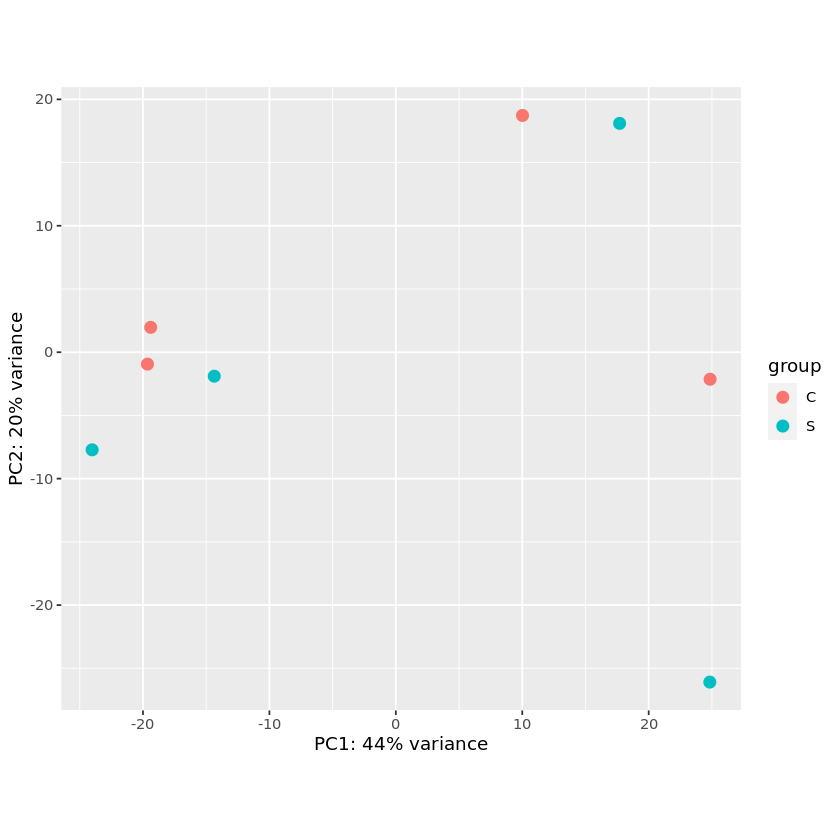

In [11]:
plotPCA(vsdata, intgroup = "condition")

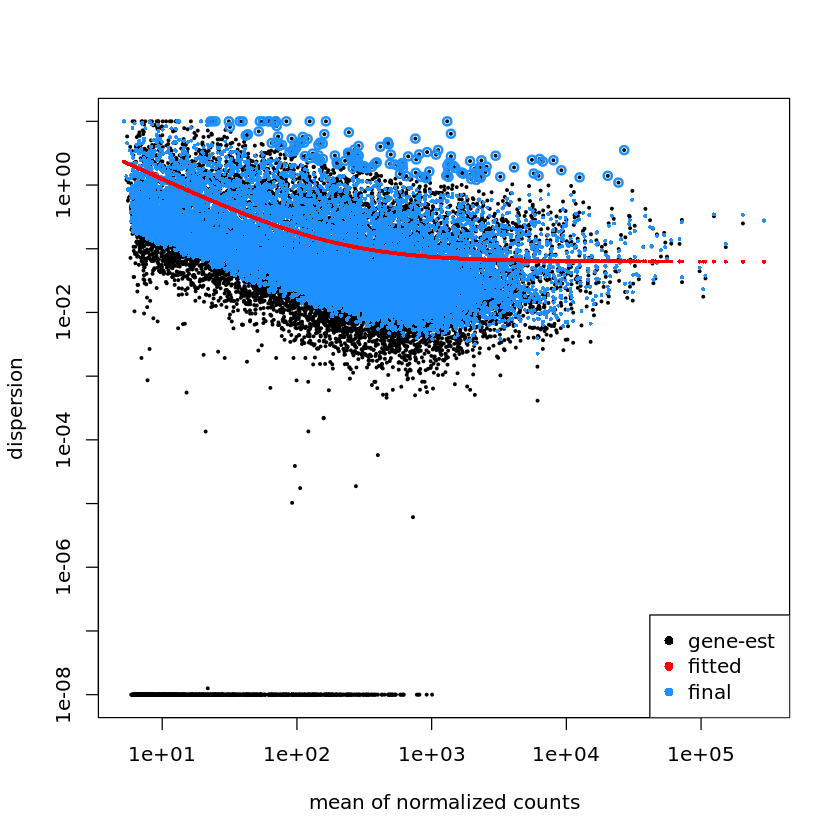

In [12]:
# plot the dispersion, this shows the variability between the replicates as a funciton of normalized read counts
# As the read counts gets higher usually there is variation, thus the red splot is trending down
# Main thing is we want the red line to trend be below 1
plotDispEsts(dds)

In [13]:
# Check the results. In the 1st row, the -0.48 mean the gene is down-regulated in the 'S' sample 
res <- results(dds, contrast = c('condition', 'S', 'C'))
res

log2 fold change (MLE): condition S vs C 
Wald test p-value: condition S vs C 
DataFrame with 14847 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat     pvalue
                 <numeric>      <numeric> <numeric> <numeric>  <numeric>
ENSG00000160072   320.8449      -0.485980  0.158346 -3.069099 0.00214706
ENSG00000041988   103.4870      -0.275697  0.162655 -1.694981 0.09007896
ENSG00000198744   119.9575       0.579348  2.346374  0.246912         NA
ENSG00000142611    23.8086      -1.884671  0.878628 -2.145016 0.03195153
ENSG00000225630   924.4206       0.739476  0.372305  1.986209 0.04701016
...                    ...            ...       ...       ...        ...
ENSG00000198727 47003.7613      0.2777116  0.250556  1.108380  0.2676977
ENSG00000210196    77.3912      0.4606167  0.249639  1.845133  0.0650182
ENSG00000276256    32.9001     -0.8296798  0.638853 -1.298703  0.1940459
ENSG00000273748    27.8913      0.0811415  0.475238  0.170739  0.8644293
ENSG0

In [14]:
# The the significantly expressed genes
# remove rows with na value
sigs <- na.omit(res)
sigs <- sigs[sigs$padj > 0.05,]
sigs

log2 fold change (MLE): condition S vs C 
Wald test p-value: condition S vs C 
DataFrame with 13170 rows and 6 columns
                  baseMean log2FoldChange     lfcSE      stat    pvalue
                 <numeric>      <numeric> <numeric> <numeric> <numeric>
ENSG00000041988   103.4870     -0.2756973  0.162655 -1.694981 0.0900790
ENSG00000142611    23.8086     -1.8846713  0.878628 -2.145016 0.0319515
ENSG00000225630   924.4206      0.7394758  0.372305  1.986209 0.0470102
ENSG00000067606    24.0683      0.3380187  0.412583  0.819274 0.4126298
ENSG00000131584   737.0944     -0.0467062  0.214054 -0.218199 0.8272744
...                    ...            ...       ...       ...       ...
ENSG00000198727 47003.7613      0.2777116  0.250556  1.108380 0.2676977
ENSG00000210196    77.3912      0.4606167  0.249639  1.845133 0.0650182
ENSG00000276256    32.9001     -0.8296798  0.638853 -1.298703 0.1940459
ENSG00000273748    27.8913      0.0811415  0.475238  0.170739 0.8644293
ENSG00000271254  

In [44]:
# write out the result
write.csv(sigs, file = 'deseq_results.csv')

In [15]:
# Save to an RDS file
saveRDS(dds, "dds.rds")

# # Load from an RDS file
# dds_restored <- readRDS("dds.rds")
